<a href="https://colab.research.google.com/github/shubhambadaya/image-classification-using-cnn/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 343M/346M [00:03<00:00, 101MB/s] 
100% 346M/346M [00:03<00:00, 101MB/s]


In [ ]:
!unzip /content/intel-image-classification.zip

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

2.5.0


In [10]:
import os
# Walk through pizza_steak directory and list number of files
print("Train data: ")
for dirpath, dirnames, filenames in os.walk("/content/seg_train/seg_train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Test data: ")
for dirpath, dirnames, filenames in os.walk("/content/seg_test/seg_test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Prediction data: ")
for dirpath, dirnames, filenames in os.walk("/content/seg_pred/seg_pred"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train data: 
There are 6 directories and 0 images in '/content/seg_train/seg_train'.
There are 0 directories and 2404 images in '/content/seg_train/seg_train/glacier'.
There are 0 directories and 2271 images in '/content/seg_train/seg_train/forest'.
There are 0 directories and 2191 images in '/content/seg_train/seg_train/buildings'.
There are 0 directories and 2512 images in '/content/seg_train/seg_train/mountain'.
There are 0 directories and 2382 images in '/content/seg_train/seg_train/street'.
There are 0 directories and 2274 images in '/content/seg_train/seg_train/sea'.
Test data: 
There are 6 directories and 0 images in '/content/seg_test/seg_test'.
There are 0 directories and 553 images in '/content/seg_test/seg_test/glacier'.
There are 0 directories and 474 images in '/content/seg_test/seg_test/forest'.
There are 0 directories and 437 images in '/content/seg_test/seg_test/buildings'.
There are 0 directories and 525 images in '/content/seg_test/seg_test/mountain'.
There are 0 dire

In [66]:
print(len([name for name in os.listdir('/content/seg_pred/seg_pred')])) 

7301


In [67]:
pred_images = [name for name in os.listdir('/content/seg_pred/seg_pred')]

In [68]:
pred_images[1:10]

['15890.jpg',
 '4366.jpg',
 '17003.jpg',
 '3778.jpg',
 '15063.jpg',
 '23081.jpg',
 '14801.jpg',
 '13292.jpg',
 '19482.jpg']

In [24]:
target_dir = '/content/seg_train/seg_train/'
target_class = 'glacier'
target_folder = target_dir + target_class
print(target_folder)
#[name for name in os.listdir('.') if os.path.isfile(name)]

/content/seg_train/seg_train/glacier


In [30]:
random_image = random.sample(os.listdir(target_folder), 1)

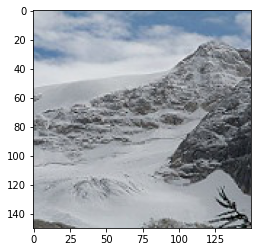

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(target_folder+'/'+random_image[0])
imgplot = plt.imshow(img)

In [32]:
def random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)


In [84]:
classnames = [name for name in os.listdir('/content/seg_train/seg_train')]

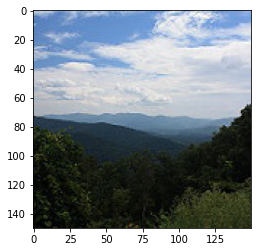

In [37]:
target_dir = '/content/seg_train/seg_train/'
target_class = 'mountain'
random_image(target_dir,target_class)

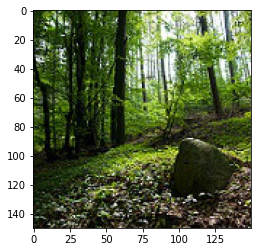

In [36]:
target_dir = '/content/seg_train/seg_train/'
target_class = 'forest'
random_image(target_dir,target_class)

In [38]:
train_dir = "/content/seg_train/seg_train/"
test_dir = "/content/seg_test/seg_test/"

In [40]:
# Create augmented data generator instance
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

In [41]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [43]:
#Load data(data, label) from directory and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [44]:
type(train_data)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [46]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [48]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(6, activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)             0

In [ ]:
history_1 = model_1.fit(train_data,
                    epochs=4,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/4
439/439 [==============================] - 391s 887ms/step - loss: 1.0931 - accuracy: 0.5745 - val_loss: 0.9619 - val_accuracy: 0.6263
Epoch 2/4
312/439 [====================>.........] - ETA: 1:47 - loss: 0.8489 - accuracy: 0.6762

In [55]:
model_1.evaluate(test_data)

94/94 [==============================] - 20s 214ms/step - loss: 0.5573 - accuracy: 0.7987


[0.557296872138977, 0.7986666560173035]

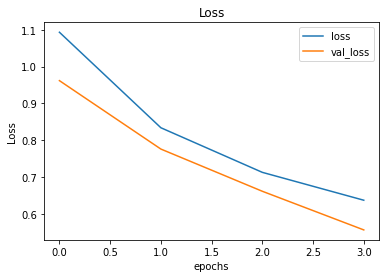

In [56]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

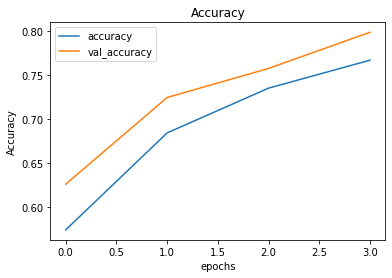

In [57]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

In [59]:
model_1.save('/content/drive/MyDrive/Files/image_intel/models/', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Files/image_intel/models/assets


In [62]:
!ls -alrt /content/drive/MyDrive/Files/image_intel/models/

total 195
drwx------ 2 root root   4096 Jul 24 11:24 variables
-rw------- 1 root root 172337 Jul 24 11:24 saved_model.pb
-rw------- 1 root root  18885 Jul 24 11:24 keras_metadata.pb
drwx------ 2 root root   4096 Jul 24 11:24 assets


In [81]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Files/image_intel/models/')

In [64]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [71]:
arr = process("/content/seg_pred/seg_pred/" + pred_images[1])

In [76]:
arr.ndim

4

In [86]:
pred_label= model_loaded.predict(process("/content/seg_pred/seg_pred/" + pred_images[1])) 
print(classnames[np.argmax(pred_label)])

mountain


In [83]:
pred_label

array([[0.000000e+00, 0.000000e+00, 4.486531e-22, 1.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)